In [10]:
! pip install kmodes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [11]:
from kmodes.kprototypes import KPrototypes

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Big Data Waterloo/Melbourne_housing_FULL.csv")

In [3]:
df = df.dropna(subset=["Price"])
if "Postcode" in df: del df["Postcode"]
if "Address" in df: del df["Address"]
if "SellerG" in df: del df["SellerG"]

if "YearBuilt" in df: del df["YearBuilt"]
if "YearBuilt" in df: del df["BuildingArea"]

df = df.dropna()

df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# Computing IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
df = df.query('(@Q1 - 1.5 * @IQR) <= Price <= (@Q3 + 1.5 * @IQR)')

In [5]:
df = df[df['Rooms'] <= 6]
df = df[df['Bathroom'] <= 4] 
df = df[df['Type'] == "h"]  
df["logprice"] = np.log(df["Price"])

df = df[(df['Regionname'] == 'Northern Metropolitan') | (df['Regionname'] == 'Western Metropolitan')| (df['Regionname'] == 'Southern Metropolitan')| (df['Regionname'] == 'Eastern Metropolitan')| (df['Regionname'] == 'South-Eastern Metropolitan')]


In [66]:
df1 = df[['Price', 'Rooms', 'Distance', 'Regionname']]
df2 = df[['Price', 'Rooms', 'Distance', 'Lattitude', 'Longtitude', 'Regionname']]

In [67]:
df1

,Price,Rooms,Distance,Regionname
2,0.401065,0.2,0.032698,Northern Metropolitan
4,0.591837,0.4,0.032698,Northern Metropolitan
6,0.651730,0.6,0.032698,Northern Metropolitan
11,0.774179,0.4,0.032698,Northern Metropolitan
14,0.667702,0.2,0.032698,Northern Metropolitan
...,...,...,...,...
34837,0.838066,0.8,0.149864,Western Metropolitan
34847,0.163709,0.4,0.659401,Northern Metropolitan
34849,0.194765,0.4,0.659401,Northern Metropolitan
34853,0.335847,0.2,0.136240,Western Metropolitan


In [68]:
scaler = MinMaxScaler() 

for col in df1.columns:
  if col != "Regionname":
    df1[col] = scaler.fit_transform(df1[col].values.reshape((df1.shape[0],1)))

df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,Price,Rooms,Distance,Regionname
2,0.401065,0.2,0.032698,Northern Metropolitan
4,0.591837,0.4,0.032698,Northern Metropolitan
6,0.651730,0.6,0.032698,Northern Metropolitan
11,0.774179,0.4,0.032698,Northern Metropolitan
14,0.667702,0.2,0.032698,Northern Metropolitan
...,...,...,...,...
34837,0.838066,0.8,0.149864,Western Metropolitan
34847,0.163709,0.4,0.659401,Northern Metropolitan
34849,0.194765,0.4,0.659401,Northern Metropolitan
34853,0.335847,0.2,0.136240,Western Metropolitan


In [69]:
categorical_features_idx = [3]

In [70]:
mark_array=df1.values

In [89]:
kproto = KPrototypes(n_clusters=1, verbose=2, max_iter=20).fit(mark_array, categorical = categorical_features_idx)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 0, ncost: 1033.0277058482102
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 0, ncost: 1033.0277058482102
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 0, ncost: 1033.0277058482102
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/20, moves: 0, ncost: 1033.0277058482102
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/20, moves: 0, ncost: 1033.0277058482102
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/20, moves: 0, ncost: 1033.0277058482102
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/20, moves: 0, ncost: 1033.0277058482102
Init: initial

In [90]:
kproto = KPrototypes(n_clusters=2, verbose=2, max_iter=20).fit(mark_array, categorical = categorical_features_idx)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 874, ncost: 784.8930485343359
Run: 1, iteration: 2/20, moves: 304, ncost: 782.9651264146133
Run: 1, iteration: 3/20, moves: 54, ncost: 782.9270491885626
Run: 1, iteration: 4/20, moves: 5, ncost: 782.9268089688911
Run: 1, iteration: 5/20, moves: 0, ncost: 782.9268089688911
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 866, ncost: 751.9372573063063
Run: 2, iteration: 2/20, moves: 203, ncost: 750.1921946693702
Run: 2, iteration: 3/20, moves: 87, ncost: 749.9678285968724
Run: 2, iteration: 4/20, moves: 33, ncost: 749.9265095454532
Run: 2, iteration: 5/20, moves: 13, ncost: 749.91950870553
Run: 2, iteration: 6/20, moves: 7, ncost: 749.9175933949329
Run: 2, iteration: 7/20, moves: 3, ncost: 749.9173797597311
Run: 2, iteration: 8/20, moves: 0, ncost: 749.9173797597311
Init: initializing centroids
Init: initializing cl

In [91]:
kproto = KPrototypes(n_clusters=3, verbose=2, max_iter=20).fit(mark_array, categorical = categorical_features_idx)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 2218, ncost: 644.4464990327648
Run: 1, iteration: 2/20, moves: 1017, ncost: 583.6083455532267
Run: 1, iteration: 3/20, moves: 394, ncost: 580.1752901051253
Run: 1, iteration: 4/20, moves: 42, ncost: 580.1511023743737
Run: 1, iteration: 5/20, moves: 5, ncost: 580.1509664238962
Run: 1, iteration: 6/20, moves: 0, ncost: 580.1509664238962
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 1304, ncost: 586.338405282752
Run: 2, iteration: 2/20, moves: 517, ncost: 580.4878118154095
Run: 2, iteration: 3/20, moves: 133, ncost: 580.0897222308816
Run: 2, iteration: 4/20, moves: 19, ncost: 580.0820416477139
Run: 2, iteration: 5/20, moves: 2, ncost: 580.081550268581
Run: 2, iteration: 6/20, moves: 0, ncost: 580.081550268581
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, m

In [92]:
kproto = KPrototypes(n_clusters=4, verbose=2, max_iter=20).fit(mark_array, categorical = categorical_features_idx)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 1578, ncost: 524.9197151529676
Run: 1, iteration: 2/20, moves: 550, ncost: 516.3140320955428
Run: 1, iteration: 3/20, moves: 278, ncost: 514.2286705523942
Run: 1, iteration: 4/20, moves: 157, ncost: 513.5455142700657
Run: 1, iteration: 5/20, moves: 92, ncost: 513.2714262191745
Run: 1, iteration: 6/20, moves: 64, ncost: 513.0929234618586
Run: 1, iteration: 7/20, moves: 74, ncost: 512.6966981611229
Run: 1, iteration: 8/20, moves: 163, ncost: 509.4549043244497
Run: 1, iteration: 9/20, moves: 535, ncost: 485.10956346491855
Run: 1, iteration: 10/20, moves: 429, ncost: 480.0913214151854
Run: 1, iteration: 11/20, moves: 196, ncost: 479.00615026500554
Run: 1, iteration: 12/20, moves: 127, ncost: 478.6591159852356
Run: 1, iteration: 13/20, moves: 23, ncost: 478.6533397092834
Run: 1, iteration: 14/20, moves: 1, ncost: 478.65324069828995
Run: 1, iteration: 15/20, moves: 0, ncost: 478.65

In [93]:
kproto = KPrototypes(n_clusters=5, verbose=2, max_iter=20).fit(mark_array, categorical = categorical_features_idx)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 1533, ncost: 478.15986130416024
Run: 1, iteration: 2/20, moves: 817, ncost: 465.5081855971232
Run: 1, iteration: 3/20, moves: 522, ncost: 447.9363916196578
Run: 1, iteration: 4/20, moves: 404, ncost: 436.0841606623952
Run: 1, iteration: 5/20, moves: 189, ncost: 435.0313055820393
Run: 1, iteration: 6/20, moves: 97, ncost: 434.6236018777388
Run: 1, iteration: 7/20, moves: 49, ncost: 434.5644549151279
Run: 1, iteration: 8/20, moves: 10, ncost: 434.56221501531707
Run: 1, iteration: 9/20, moves: 0, ncost: 434.56221501531707
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 2051, ncost: 486.6928339026069
Run: 2, iteration: 2/20, moves: 545, ncost: 480.43212794136747
Run: 2, iteration: 3/20, moves: 204, ncost: 479.4683011886955
Run: 2, iteration: 4/20, moves: 151, ncost: 477.8065270064043
Run: 2, iteration: 5/20, moves: 3

In [94]:
kproto = KPrototypes(n_clusters=6, verbose=2, max_iter=20).fit(mark_array, categorical = categorical_features_idx)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 1689, ncost: 437.6539758678521
Run: 1, iteration: 2/20, moves: 1101, ncost: 396.36404586873124
Run: 1, iteration: 3/20, moves: 679, ncost: 382.07903978023586
Run: 1, iteration: 4/20, moves: 305, ncost: 380.1069929674576
Run: 1, iteration: 5/20, moves: 93, ncost: 379.8862040405799
Run: 1, iteration: 6/20, moves: 19, ncost: 379.87655400382965
Run: 1, iteration: 7/20, moves: 4, ncost: 379.87591713041735
Run: 1, iteration: 8/20, moves: 0, ncost: 379.87591713041735
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 1782, ncost: 426.6407639830787
Run: 2, iteration: 2/20, moves: 1036, ncost: 399.86618271215474
Run: 2, iteration: 3/20, moves: 514, ncost: 390.8326859287417
Run: 2, iteration: 4/20, moves: 236, ncost: 388.76934450796995
Run: 2, iteration: 5/20, moves: 177, ncost: 387.6194906223298
Run: 2, iteration: 6/20, move

In [95]:
kproto = KPrototypes(n_clusters=7, verbose=2, max_iter=20).fit(mark_array, categorical = categorical_features_idx)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 2440, ncost: 369.3354110432505
Run: 1, iteration: 2/20, moves: 736, ncost: 359.74035550588974
Run: 1, iteration: 3/20, moves: 234, ncost: 358.16119345045496
Run: 1, iteration: 4/20, moves: 157, ncost: 356.9928524996698
Run: 1, iteration: 5/20, moves: 160, ncost: 354.65338694622284
Run: 1, iteration: 6/20, moves: 195, ncost: 351.75254464782967
Run: 1, iteration: 7/20, moves: 78, ncost: 351.4515969246774
Run: 1, iteration: 8/20, moves: 32, ncost: 351.3902276720199
Run: 1, iteration: 9/20, moves: 22, ncost: 351.36501569849474
Run: 1, iteration: 10/20, moves: 7, ncost: 351.3624578822415
Run: 1, iteration: 11/20, moves: 4, ncost: 351.35956591469204
Run: 1, iteration: 12/20, moves: 4, ncost: 351.3589349034721
Run: 1, iteration: 13/20, moves: 1, ncost: 351.35856781786634
Run: 1, iteration: 14/20, moves: 0, ncost: 351.35856781786634
Init: initializing centroids
Init: initializing clu

In [96]:
kproto = KPrototypes(n_clusters=8, verbose=2, max_iter=20).fit(mark_array, categorical = categorical_features_idx)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 2052, ncost: 360.3099057369185
Run: 1, iteration: 2/20, moves: 1018, ncost: 343.93448639224266
Run: 1, iteration: 3/20, moves: 266, ncost: 342.5785531912573
Run: 1, iteration: 4/20, moves: 102, ncost: 342.3357963498639
Run: 1, iteration: 5/20, moves: 64, ncost: 342.2085874539845
Run: 1, iteration: 6/20, moves: 77, ncost: 342.0498556272341
Run: 1, iteration: 7/20, moves: 56, ncost: 341.9350117231485
Run: 1, iteration: 8/20, moves: 53, ncost: 341.8163920068152
Run: 1, iteration: 9/20, moves: 54, ncost: 341.7216567637246
Run: 1, iteration: 10/20, moves: 60, ncost: 341.6079549762156
Run: 1, iteration: 11/20, moves: 30, ncost: 341.56968829463483
Run: 1, iteration: 12/20, moves: 20, ncost: 341.5457450452369
Run: 1, iteration: 13/20, moves: 9, ncost: 341.5381367077482
Run: 1, iteration: 14/20, moves: 0, ncost: 341.5381367077482
Init: initializing centroids
Init: initializing cluster

In [97]:
kproto = KPrototypes(n_clusters=9, verbose=2, max_iter=20).fit(mark_array, categorical = categorical_features_idx)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 2321, ncost: 342.27371552999443
Run: 1, iteration: 2/20, moves: 1012, ncost: 328.5311767234104
Run: 1, iteration: 3/20, moves: 376, ncost: 326.36477405413973
Run: 1, iteration: 4/20, moves: 184, ncost: 325.12510839476073
Run: 1, iteration: 5/20, moves: 86, ncost: 324.8816040863976
Run: 1, iteration: 6/20, moves: 63, ncost: 324.74875592335115
Run: 1, iteration: 7/20, moves: 59, ncost: 324.63101580326
Run: 1, iteration: 8/20, moves: 47, ncost: 324.5547178326476
Run: 1, iteration: 9/20, moves: 44, ncost: 324.47058748603223
Run: 1, iteration: 10/20, moves: 55, ncost: 324.35551002093064
Run: 1, iteration: 11/20, moves: 57, ncost: 324.29296745077386
Run: 1, iteration: 12/20, moves: 25, ncost: 324.2785228122179
Run: 1, iteration: 13/20, moves: 11, ncost: 324.2730547180288
Run: 1, iteration: 14/20, moves: 2, ncost: 324.2724594190515
Run: 1, iteration: 15/20, moves: 1, ncost: 324.2723

In [98]:
kproto = KPrototypes(n_clusters=10, verbose=2, max_iter=20).fit(mark_array, categorical = categorical_features_idx)

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 2100, ncost: 300.8925567925389
Run: 1, iteration: 2/20, moves: 739, ncost: 292.41259060201503
Run: 1, iteration: 3/20, moves: 229, ncost: 290.6881414857703
Run: 1, iteration: 4/20, moves: 143, ncost: 289.64058326480665
Run: 1, iteration: 5/20, moves: 100, ncost: 289.2502843040904
Run: 1, iteration: 6/20, moves: 91, ncost: 288.93854706670515
Run: 1, iteration: 7/20, moves: 103, ncost: 288.55979033077193
Run: 1, iteration: 8/20, moves: 81, ncost: 288.26082471703586
Run: 1, iteration: 9/20, moves: 220, ncost: 267.718714545655
Run: 1, iteration: 10/20, moves: 233, ncost: 266.2542988750821
Run: 1, iteration: 11/20, moves: 69, ncost: 266.0554603204743
Run: 1, iteration: 12/20, moves: 56, ncost: 265.9443818322045
Run: 1, iteration: 13/20, moves: 30, ncost: 265.8893912836899
Run: 1, iteration: 14/20, moves: 17, ncost: 265.86920

In [85]:
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)

In [86]:
df2['cluster'] = list(clusters)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
df2

,Price,Rooms,Distance,Lattitude,Longtitude,Regionname,cluster
2,0.401065,0.2,0.032698,0.572683,0.539636,Northern Metropolitan,0
4,0.591837,0.4,0.032698,0.570495,0.541003,Northern Metropolitan,0
6,0.651730,0.6,0.032698,0.573777,0.540593,Northern Metropolitan,2
11,0.774179,0.4,0.032698,0.581278,0.547701,Northern Metropolitan,2
14,0.667702,0.2,0.032698,0.575652,0.542370,Northern Metropolitan,0
...,...,...,...,...,...,...,...
34837,0.838066,0.8,0.149864,0.488451,0.382636,Western Metropolitan,2
34847,0.163709,0.4,0.659401,0.867261,0.602668,Northern Metropolitan,3
34849,0.194765,0.4,0.659401,0.881466,0.595041,Northern Metropolitan,3
34853,0.335847,0.2,0.136240,0.560791,0.395910,Western Metropolitan,1


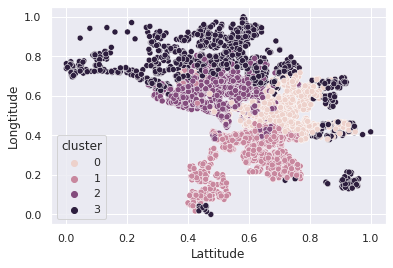

In [88]:
sns.scatterplot(data=df2, x="Lattitude", y="Longtitude", hue="cluster")